In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
from tqdm import tqdm

In [4]:
import datetime

In [5]:
from scipy import stats

# Data building

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
import statsmodels.api as sm

In [23]:
df = pd.read_csv("data/estest.txt", sep=",")
df

,Date,Time,Open,High,Low,Close,Up,Down
0,05/25/2022,15:00:01,3972.25,3972.25,3971.25,3971.75,36,20
1,05/25/2022,15:00:02,3971.75,3972.25,3971.75,3972.25,25,0
2,05/25/2022,15:00:03,3972.25,3972.25,3972.25,3972.25,2,0
3,05/25/2022,15:00:04,3972.25,3972.25,3972.00,3972.25,7,5
4,05/25/2022,15:00:05,3972.25,3973.00,3972.25,3972.75,9,1
...,...,...,...,...,...,...,...,...
42045,05/26/2022,10:58:28,4065.00,4065.25,4065.00,4065.25,27,4
42046,05/26/2022,10:58:29,4065.00,4065.25,4065.00,4065.00,7,3
42047,05/26/2022,10:58:30,4065.00,4065.25,4065.00,4065.25,12,42
42048,05/26/2022,10:58:31,4065.25,4065.25,4065.00,4065.25,9,1


In [24]:
df['Datetime'] = df['Date'] + ' ' + df['Time']
df

,Date,Time,Open,High,Low,Close,Up,Down,Datetime
0,05/25/2022,15:00:01,3972.25,3972.25,3971.25,3971.75,36,20,05/25/2022 15:00:01
1,05/25/2022,15:00:02,3971.75,3972.25,3971.75,3972.25,25,0,05/25/2022 15:00:02
2,05/25/2022,15:00:03,3972.25,3972.25,3972.25,3972.25,2,0,05/25/2022 15:00:03
3,05/25/2022,15:00:04,3972.25,3972.25,3972.00,3972.25,7,5,05/25/2022 15:00:04
4,05/25/2022,15:00:05,3972.25,3973.00,3972.25,3972.75,9,1,05/25/2022 15:00:05
...,...,...,...,...,...,...,...,...,...
42045,05/26/2022,10:58:28,4065.00,4065.25,4065.00,4065.25,27,4,05/26/2022 10:58:28
42046,05/26/2022,10:58:29,4065.00,4065.25,4065.00,4065.00,7,3,05/26/2022 10:58:29
42047,05/26/2022,10:58:30,4065.00,4065.25,4065.00,4065.25,12,42,05/26/2022 10:58:30
42048,05/26/2022,10:58:31,4065.25,4065.25,4065.00,4065.25,9,1,05/26/2022 10:58:31


In [25]:
df = df[['Datetime', 'Open', 'High', 'Low', 'Close']]
df

,Datetime,Open,High,Low,Close
0,05/25/2022 15:00:01,3972.25,3972.25,3971.25,3971.75
1,05/25/2022 15:00:02,3971.75,3972.25,3971.75,3972.25
2,05/25/2022 15:00:03,3972.25,3972.25,3972.25,3972.25
3,05/25/2022 15:00:04,3972.25,3972.25,3972.00,3972.25
4,05/25/2022 15:00:05,3972.25,3973.00,3972.25,3972.75
...,...,...,...,...,...
42045,05/26/2022 10:58:28,4065.00,4065.25,4065.00,4065.25
42046,05/26/2022 10:58:29,4065.00,4065.25,4065.00,4065.00
42047,05/26/2022 10:58:30,4065.00,4065.25,4065.00,4065.25
42048,05/26/2022 10:58:31,4065.25,4065.25,4065.00,4065.25


In [26]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df

,Datetime,Open,High,Low,Close
0,2022-05-25 15:00:01,3972.25,3972.25,3971.25,3971.75
1,2022-05-25 15:00:02,3971.75,3972.25,3971.75,3972.25
2,2022-05-25 15:00:03,3972.25,3972.25,3972.25,3972.25
3,2022-05-25 15:00:04,3972.25,3972.25,3972.00,3972.25
4,2022-05-25 15:00:05,3972.25,3973.00,3972.25,3972.75
...,...,...,...,...,...
42045,2022-05-26 10:58:28,4065.00,4065.25,4065.00,4065.25
42046,2022-05-26 10:58:29,4065.00,4065.25,4065.00,4065.00
42047,2022-05-26 10:58:30,4065.00,4065.25,4065.00,4065.25
42048,2022-05-26 10:58:31,4065.25,4065.25,4065.00,4065.25


In [27]:
def min1(x):
    # print(type(x))
    x - datetime.timedelta(0, 1)
    return x

In [28]:
df['Datetime'] = df['Datetime'].apply(lambda x: min1(x))
df

,Datetime,Open,High,Low,Close
0,2022-05-25 15:00:01,3972.25,3972.25,3971.25,3971.75
1,2022-05-25 15:00:02,3971.75,3972.25,3971.75,3972.25
2,2022-05-25 15:00:03,3972.25,3972.25,3972.25,3972.25
3,2022-05-25 15:00:04,3972.25,3972.25,3972.00,3972.25
4,2022-05-25 15:00:05,3972.25,3973.00,3972.25,3972.75
...,...,...,...,...,...
42045,2022-05-26 10:58:28,4065.00,4065.25,4065.00,4065.25
42046,2022-05-26 10:58:29,4065.00,4065.25,4065.00,4065.00
42047,2022-05-26 10:58:30,4065.00,4065.25,4065.00,4065.25
42048,2022-05-26 10:58:31,4065.25,4065.25,4065.00,4065.25


In [29]:
ohlc_dict = {
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last"
}

In [30]:
df_resample_raw = df.set_index("Datetime").resample("1T", closed="left", label="left").agg(ohlc_dict)

In [31]:
df_resample_raw.reset_index(inplace=True)

In [32]:
df_resample = df_resample_raw.dropna(subset=['Open'])

In [17]:
df_resample['hl2'] = ((df_resample['High'] - df_resample['Low']) / 2) + df_resample['Low']

In [20]:
df_resample['Date'] = df_resample['Datetime'].dt.date

In [33]:
df_resample.to_csv("data/resampled.csv", index=False)

In [21]:
df_try = df_resample[df_resample['Date'] == datetime.date(2022, 4, 4)].iloc[-30:]

In [ ]:
df_try = df_try.reset_index().drop(columns='index').reset_index()
df_try

## Statsmodel api

In [38]:
x = df_try['index'].to_list()
y = df_try['hl2'].to_list()

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

In [39]:
print(result.params)

[ 4.57364516e+03 -4.70800890e-02]


In [40]:
result.fittedvalues

array([4573.64516129, 4573.5980812 , 4573.55100111, 4573.50392102,
       4573.45684093, 4573.40976085, 4573.36268076, 4573.31560067,
       4573.26852058, 4573.22144049, 4573.1743604 , 4573.12728031,
       4573.08020022, 4573.03312013, 4572.98604004, 4572.93895996,
       4572.89187987, 4572.84479978, 4572.79771969, 4572.7506396 ,
       4572.70355951, 4572.65647942, 4572.60939933, 4572.56231924,
       4572.51523915, 4572.46815907, 4572.42107898, 4572.37399889,
       4572.3269188 , 4572.27983871])

In [41]:
df_try['linreg2'] = result.fittedvalues

## Sklearn

In [23]:
lr = LinearRegression()

In [28]:
lr.fit(df_try[['index']], df_try['hl2'])

LinearRegression()

In [48]:
m = lr.coef_[0]

In [49]:
m

-0.047080088987764175

In [50]:
c = lr.intercept_

In [51]:
c

4573.645161290322

In [32]:
res = lr.predict(df_try[['index']])

In [35]:
df_try['linreg1'] = res

<AxesSubplot:>

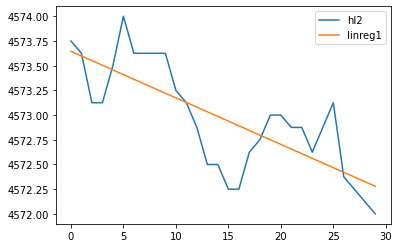

In [37]:
df_try[['hl2','linreg1']].plot()

In [57]:
df_try.head()

,index,Datetime,Open,High,Low,Close,hl2,Date,linreg1,linreg2,line
0,0,2022-04-04 23:30:00,4574.00,4574.00,4573.50,4573.50,4573.750,2022-04-04,4573.645161,4573.645161,4573.645161
1,1,2022-04-04 23:31:00,4573.75,4573.75,4573.50,4573.50,4573.625,2022-04-04,4573.598081,4573.598081,4573.598081
2,2,2022-04-04 23:32:00,4573.25,4573.25,4573.00,4573.25,4573.125,2022-04-04,4573.551001,4573.551001,4573.551001
3,3,2022-04-04 23:33:00,4573.00,4573.50,4572.75,4573.25,4573.125,2022-04-04,4573.503921,4573.503921,4573.503921
4,4,2022-04-04 23:34:00,4573.50,4573.75,4573.25,4573.75,4573.500,2022-04-04,4573.456841,4573.456841,4573.456841


In [55]:
def lin_reg(x):
    return (m * x) + c

In [56]:
df_try['line'] = df_try['index'].apply(lin_reg)

# Master plotting

In [45]:
master = pd.read_csv("master.csv")

In [46]:
master['Datetime'] = pd.to_datetime(master['Datetime'])

In [47]:
plot_df = master[(master['Datetime'].dt.time >= datetime.time(6, 0)) & (master['Datetime'].dt.time <= datetime.time(10, 0))].set_index('Datetime')[['hl2','High','Low','lin_reg','cont_up','cont_down']]

<AxesSubplot:xlabel='Datetime'>

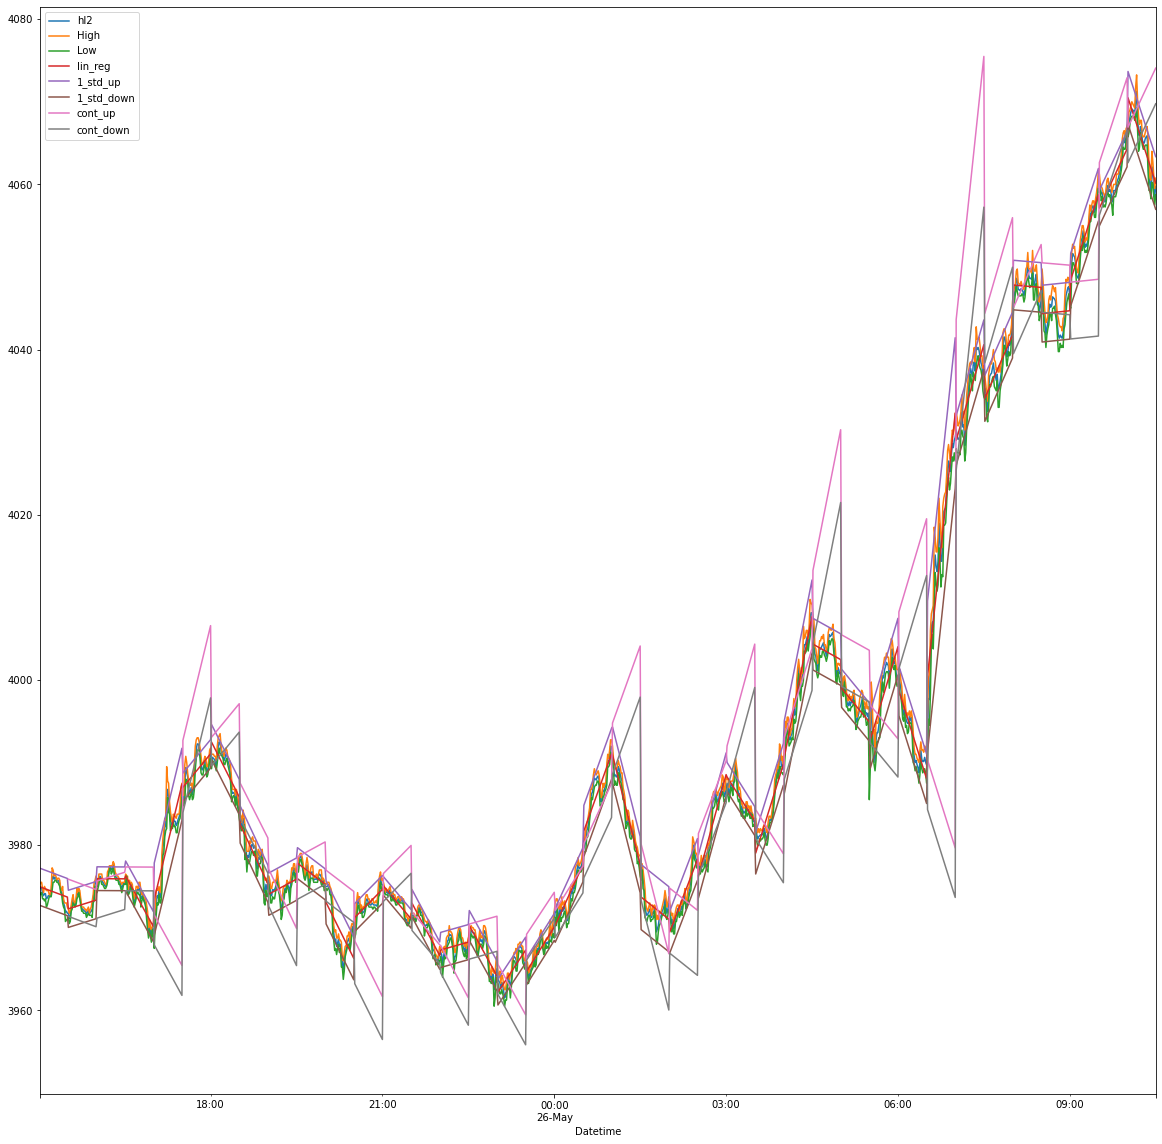

In [49]:
master.set_index('Datetime')[['hl2','High','Low','lin_reg','1_std_up','1_std_down','cont_up','cont_down']].plot(figsize=(20,20))

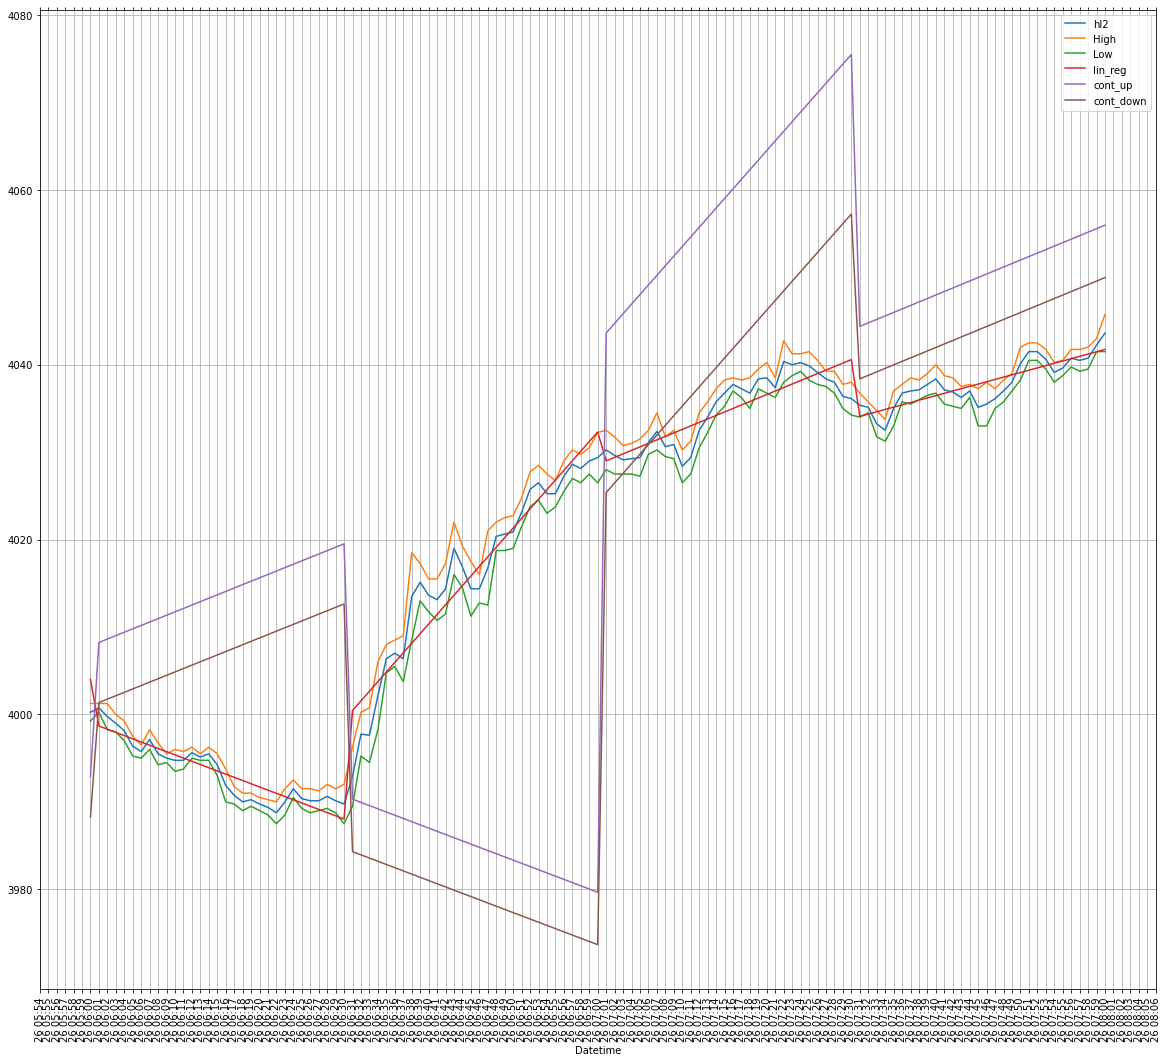

In [50]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dates = pd.date_range(start="2022-05-26 06:30:00", end="2022-05-26 10:37:00", freq="T")
df = plot_df[(plot_df.index.time >= datetime.time(6, 0)) & (plot_df.index.time <= datetime.time(8, 0))]

fig,ax = plt.subplots()
df.plot(x_compat=True,ax=ax, figsize=(20,20))

ax.xaxis.set_tick_params(reset=True)
ax.xaxis.set_major_locator(mdates.MinuteLocator())
plt.yticks(np.arange(df['Low'].min()-1, df['High'].max()+1, 1.0))
plt.xticks(rotation=90)
plt.grid()
plt.show()